In [1]:
import wordcloud
import numpy as np
import pandas as pd

import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nada\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from sklearn import metrics
from keras.utils import np_utils
#from keras.layers.core import Dense, Dropout, Activation, Lambda
from collections import defaultdict
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('train.csv')
# 3shan ashil error l AttributeError: 'float' object has no attribute 'lower'
#data.SentimentText=data.SentimentText.astype(str)
data = data.dropna()
data.columns =['polarity','title','text',]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048548 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1048548 non-null  int64 
 1   title     1048548 non-null  object
 2   text      1048548 non-null  object
dtypes: int64(1), object(2)
memory usage: 32.0+ MB


In [4]:
data['text'].head()
print('\n')
data['text'].count()

1048548

In [5]:
stop_words = stopwords.words('english')

In [6]:
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')

def preprocess(document):
    document = document.lower() # Convert to lowercase
    words = tokenizer.tokenize(document) # Tokenize
    words = [w for w in words if not w in stop_words] # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

In [7]:
data['text'] = data['text'].apply(preprocess)

In [26]:
data['polarity'].value_counts()

2    530148
1    518400
Name: polarity, dtype: int64

In [27]:
data2 = data[["polarity","text"]]
data2.groupby('polarity').describe()

text                   
           count  unique   top freq
polarity                           
1         518400  517614  name    9
2         530148  529808  name   21

# Training testing

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['polarity'], random_state=0,test_size = 0.25)

In [29]:
print(data['polarity'].value_counts())

2    530148
1    518400
Name: polarity, dtype: int64


In [30]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (786411,)
y_train shape: (786411,)

x_test shape: (262137,)
y_test shape: (262137,)



In [31]:
x_train


614927    get seat son day ago love month old almost rea...
88430     lie long dvd minute description disappoint als...
380622    blink late release know untitled hype new blin...
982426    thing readout scale instruction read htem swr ...
775144    price device truly offer great value connectio...
                                ...                        
963421    love movie happy finally convenient video library
117955    last great rush album hold fire two follow ok ...
435841    thank diane believe feel ki part u high price ...
305723    discuss son financial difficulty cpa recommend...
985799    son month old absoutely love youtube gummy bea...
Name: text, Length: 786411, dtype: object

In [32]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<786411x59524 sparse matrix of type '<class 'numpy.int64'>'
	with 24729004 stored elements in Compressed Sparse Row format>


In [33]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Number of features: 59524


In [36]:
print("Show some feature names : \n", vectorizer.get_feature_names()[::50])

Show some feature names : 
 ['aa', 'abberline', 'ableto', 'abrams', 'absorbency', 'acacia', 'accidentaly', 'accuracy', 'acidity', 'acr', 'actuacion', 'adamson', 'adelante', 'adler', 'adore', 'adverse', 'aerogrow', 'afford', 'afterglow', 'aggrandize', 'agoraphobic', 'ahmad', 'airborn', 'aja', 'alarm', 'albuquerque', 'alert', 'ali', 'allegation', 'allover', 'along', 'altavista', 'alva', 'amason', 'ambivalence', 'amethyst', 'amon', 'amusement', 'anarchist', 'andersen', 'andwas', 'anglos', 'anna', 'anodize', 'antecdotes', 'antipathy', 'anycom', 'apalled', 'apocolyptic', 'appear', 'applicable', 'appropriateness', 'aquaintances', 'araya', 'arcitec', 'argus', 'armando', 'aronofsky', 'arsenic', 'artisit', 'ascii', 'asit', 'assassination', 'assuredly', 'asv', 'atic', 'attachable', 'attolia', 'audio', 'aur', 'authoritarian', 'autora', 'ave', 'avr', 'awry', 'azar', 'babyliss', 'backhoe', 'bacterial', 'bagger', 'bal', 'ballet', 'bancroft', 'banke', 'barbie', 'barman', 'barstow', 'basie', 'batali',

In [37]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [38]:
X_test = vectorizer.transform(x_test)

In [39]:
# Predicting the Test set results  
y_pred =mnb.predict(X_test)

In [40]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8198575554004204


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82    129319
           2       0.83      0.81      0.82    132818

    accuracy                           0.82    262137
   macro avg       0.82      0.82      0.82    262137
weighted avg       0.82      0.82      0.82    262137



In [42]:
from sklearn.metrics import classification_report, confusion_matrix
ConfMat=confusion_matrix(y_test, y_pred)
print(ConfMat)

[[106926  22393]
 [ 24829 107989]]


NameError: name 'plt' is not defined

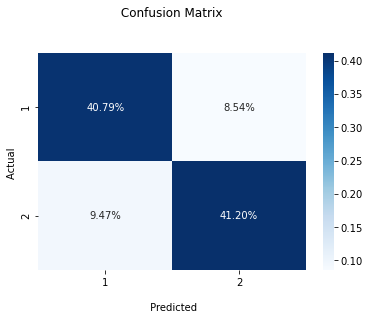

In [25]:
import seaborn as sns
ax = sns.heatmap(ConfMat/np.sum(ConfMat),fmt='.2%', annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix \n\n');
ax.set_xlabel('\n Predicted')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1', '2'])
ax.yaxis.set_ticklabels(['1', '2',])

## Display the visualization of the Confusion Matrix.
##plt.show()

In [ ]:
.0.